Основной задачей текущего ноутбука является предсказание рейтинга вина по его характеристикам.

Для задачи классификации в идеальном случае требуется маппинг соответствия между `quality` и оценкой, для этого достаточно добавить постобработчик на выходе модели

In [74]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Загрузка датасета, просмотр его структуры и основных параметров

In [75]:
data = pd.read_csv('./data/winequality-red.csv', delimiter=';')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

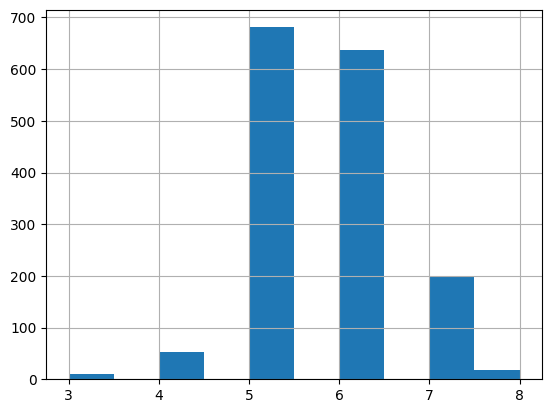

In [76]:
target = 'quality'
data[target].hist();

In [77]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [78]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

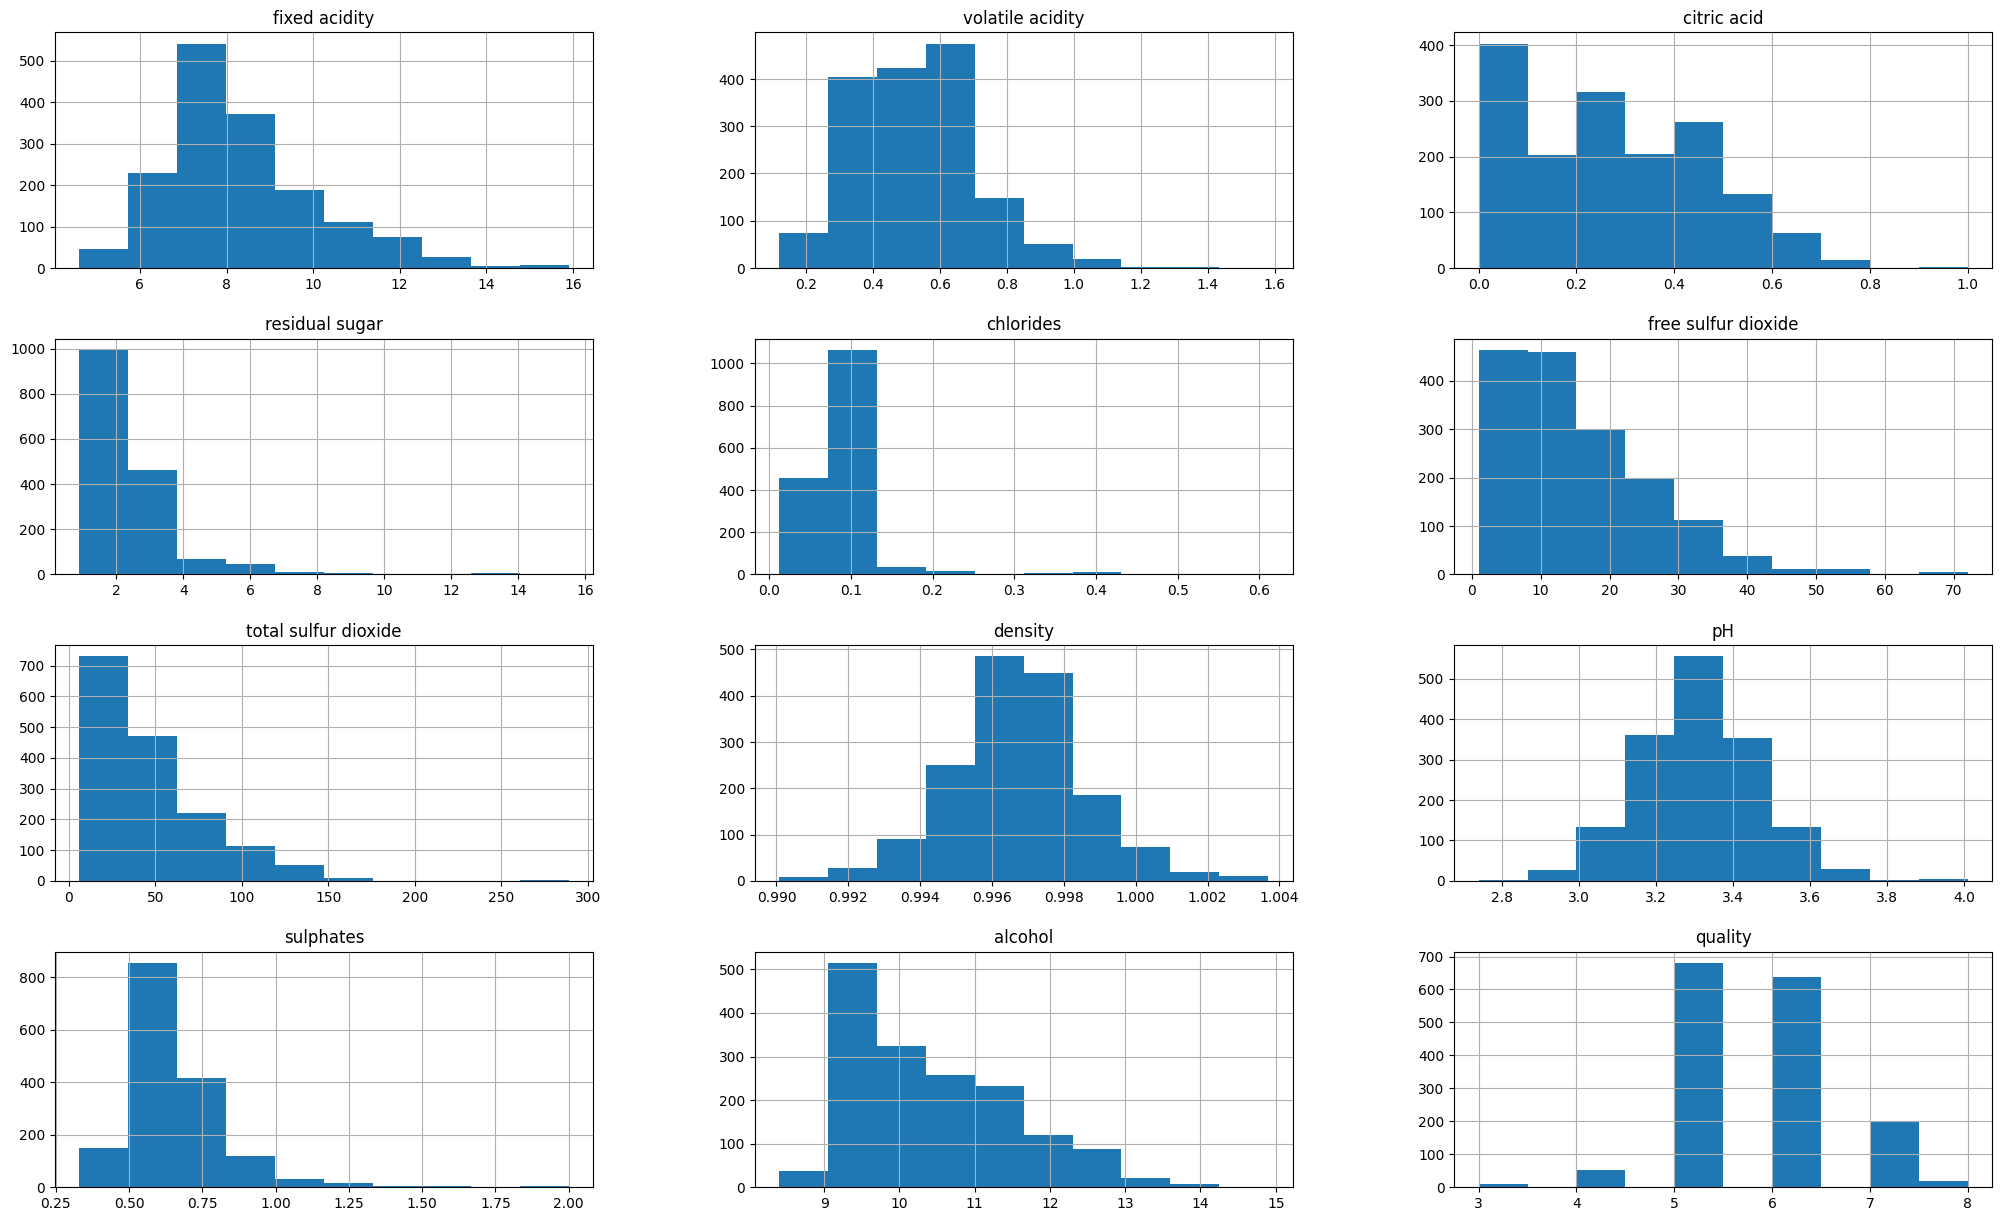

In [79]:
data.hist(figsize=(25, 15))

plt.show()

<Axes: >

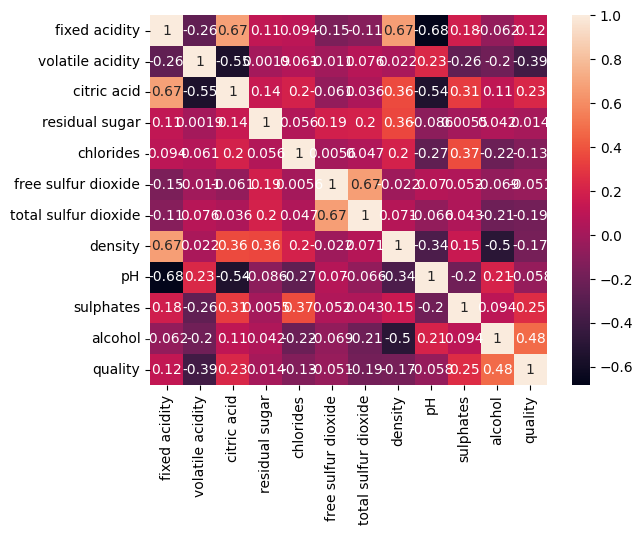

In [80]:
sns.heatmap(data.corr(), annot=True)

Исходя из матрицы корреляций, видно что высокие (>0.6) значения корреляций наблюдаются у столбцов `"fixed acidity"` и `"total sulfur dioxide"`

In [81]:
data = data.drop(['fixed acidity', 'total sulfur dioxide'], axis=1)
# data = data.drop(['density', 'total sulfur dioxide'], axis=1) # for white wine

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1199, 9), (400, 9), (1199,), (400,))

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import root_mean_squared_error
scores = {}

In [85]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
scores['GradientBoostingRegressor'] = root_mean_squared_error(Y_test, predict)
scores['GradientBoostingRegressor']

0.6074328442234201

In [86]:
model = XGBRegressor(random_state=42)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
scores['XGBRegressor'] = root_mean_squared_error(Y_test, predict)
scores['XGBRegressor']

0.6264966543496977

In [87]:
model = LGBMRegressor(random_state=42)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
scores['LGBMRegressor'] = root_mean_squared_error(Y_test, predict)
scores['LGBMRegressor']

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 9
[LightGBM] [Info] Start training from score 5.627189


0.5800557776872953

In [88]:
model = CatBoostRegressor(random_state=42)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
scores['CatBoostRegressor'] = root_mean_squared_error(Y_test, predict)
scores['CatBoostRegressor']

Learning rate set to 0.042134
0:	learn: 0.8037074	total: 1.16ms	remaining: 1.16s
1:	learn: 0.7938248	total: 1.79ms	remaining: 896ms
2:	learn: 0.7848846	total: 2.4ms	remaining: 797ms
3:	learn: 0.7758952	total: 3.15ms	remaining: 785ms
4:	learn: 0.7672043	total: 3.94ms	remaining: 783ms
5:	learn: 0.7580840	total: 4.52ms	remaining: 749ms
6:	learn: 0.7510868	total: 5.04ms	remaining: 714ms
7:	learn: 0.7441316	total: 5.52ms	remaining: 685ms
8:	learn: 0.7375947	total: 5.98ms	remaining: 658ms
9:	learn: 0.7303574	total: 6.48ms	remaining: 641ms
10:	learn: 0.7234259	total: 6.93ms	remaining: 624ms
11:	learn: 0.7172200	total: 7.4ms	remaining: 609ms
12:	learn: 0.7109163	total: 7.98ms	remaining: 606ms
13:	learn: 0.7054168	total: 8.7ms	remaining: 612ms
14:	learn: 0.7006169	total: 9.18ms	remaining: 603ms
15:	learn: 0.6956775	total: 9.71ms	remaining: 597ms
16:	learn: 0.6910483	total: 10.2ms	remaining: 588ms
17:	learn: 0.6866976	total: 10.6ms	remaining: 579ms
18:	learn: 0.6827427	total: 11.2ms	remaining: 5

0.5706439257174896

In [89]:
print('base scores without tuning')
print()
print(f'| {"name":26}| {"rmse":8} |')
print(f'|-{"-"*26}|{"-"*9}-|')
for name, score in scores.items():
    print(f'| {name:26}| {score:.6} |')

base scores without tuning

| name                      | rmse     |
|---------------------------|----------|
| GradientBoostingRegressor | 0.607433 |
| XGBRegressor              | 0.626497 |
| LGBMRegressor             | 0.580056 |
| CatBoostRegressor         | 0.570644 |


Далее настроим параметры моделей на кросс-валидации

In [90]:
from sklearn.model_selection import GridSearchCV
tune_scores = {}
best_parameters = {}

In [91]:
model = GradientBoostingRegressor(random_state=42)
parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'n_estimators' : [1, 5, 10, 50, 100, 250, 500],
    'min_samples_leaf': [1, 5, 10, 25, 50]
}
gs = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
gs.fit(X_train, Y_train)
best_parameters['GradientBoostingRegressor'] = gs.best_params_
print(f'best parameters: {gs.best_params_}')
predict = gs.predict(X_test)
tune_scores['GradientBoostingRegressor'] = root_mean_squared_error(Y_test, predict)
tune_scores['GradientBoostingRegressor']

best parameters: {'learning_rate': 0.01, 'min_samples_leaf': 50, 'n_estimators': 500}


0.6045384769417198

In [92]:
model = XGBRegressor(random_state=42)
parameters = {
    'eta': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth' : [1, 2, 5, 7, 10, 20],
    'max_leaves': [1, 5, 10, 25, 50]
}
gs = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
gs.fit(X_train, Y_train)
best_parameters['XGBRegressor'] = gs.best_params_
print(f'best parameters: {gs.best_params_}')
predict = gs.predict(X_test)
tune_scores['XGBRegressor'] = root_mean_squared_error(Y_test, predict)
tune_scores['XGBRegressor']

best parameters: {'eta': 0.05, 'max_depth': 20, 'max_leaves': 50}


0.5979229174068451

In [93]:
model = LGBMRegressor(random_state=42, verbosity=-1)
parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth' : [-1, 1, 2, 5, 7, 10, 20],
    'n_estimators' : [1, 5, 10, 50, 100, 250, 500],
    'num_leaves': [2, 5, 10, 25, 50]
}
gs = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
gs.fit(X_train, Y_train)
best_parameters['LGBMRegressor'] = gs.best_params_
print(f'best parameters: {gs.best_params_}')
predict = gs.predict(X_test)
tune_scores['LGBMRegressor'] = root_mean_squared_error(Y_test, predict)
tune_scores['LGBMRegressor']

best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 50}


0.588745213356074

In [94]:
model = CatBoostRegressor(random_state=42)
parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'depth' : [1, 2, 5, 7, 10],
    'iterations' : [1, 5, 10, 50, 100, 250, 500]
}
gs = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
gs.fit(X_train, Y_train)
best_parameters['CatBoostRegressor'] = gs.best_params_
print(f'best parameters: {gs.best_params_}')
predict = gs.predict(X_test)
tune_scores['CatBoostRegressor'] = root_mean_squared_error(Y_test, predict)
tune_scores['CatBoostRegressor']

0:	learn: 0.7943338	total: 53.8ms	remaining: 0us
0:	learn: 0.7231781	total: 145us	remaining: 0us
0:	learn: 0.7373171	total: 162us	remaining: 0us
0:	learn: 0.8270293	total: 55.8ms	remaining: 0us
0:	learn: 0.8000817	total: 55.5ms	remaining: 0us
0:	learn: 0.7555326	total: 333us	remaining: 0us
0:	learn: 0.8045133	total: 54ms	remaining: 0us
0:	learn: 0.8000817	total: 189us	remaining: 759us
1:	learn: 0.7985221	total: 374us	remaining: 561us
2:	learn: 0.7970978	total: 537us	remaining: 358us
0:	learn: 0.8216673	total: 52.1ms	remaining: 0us
3:	learn: 0.7957607	total: 1.12ms	remaining: 280us
0:	learn: 0.8099441	total: 116us	remaining: 466us
4:	learn: 0.7945799	total: 1.56ms	remaining: 0us
1:	learn: 0.8085984	total: 709us	remaining: 1.06ms
2:	learn: 0.8075227	total: 786us	remaining: 524us
3:	learn: 0.8061712	total: 860us	remaining: 215us
4:	learn: 0.8049645	total: 930us	remaining: 0us
0:	learn: 0.8270293	total: 104us	remaining: 419us
1:	learn: 0.8256518	total: 175us	remaining: 262us
2:	learn: 0.82

0.5547066230378007

In [95]:
print('tune scores')
print()
print(f'| {"name":26}| {"rmse base":8} | {"rmse tune":8} |')
print(f'|-{"-"*26}|{"-"*11}|{"-"*11}|')
for name in scores:
    print(f'| {name:26}| {scores[name]:.7} | {tune_scores[name]:.7} |')

tune scores

| name                      | rmse base | rmse tune |
|---------------------------|-----------|-----------|
| GradientBoostingRegressor | 0.6074328 | 0.6045385 |
| XGBRegressor              | 0.6264967 | 0.5979229 |
| LGBMRegressor             | 0.5800558 | 0.5887452 |
| CatBoostRegressor         | 0.5706439 | 0.5547066 |


| name                      | rmse base | rmse tune |
|---------------------------|-----------|-----------|
| GradientBoostingRegressor | 0.6074328 | 0.6045385 |
| XGBRegressor              | 0.6264967 | 0.5979229 |
| LGBMRegressor             | 0.5800558 | 0.5887452 |
| CatBoostRegressor         | 0.5706439 | 0.5547066 |

Оптимальное значение показал `CatBoostRegressor` (RMSE `0.5475698`) с параметрами `'depth': 10, 'iterations': 500, 'learning_rate': 0.05`

Для белого вина предобработка и параметры отличаются. В случае более универсального распознавания, можно добавить фичу с типом вина и поставить ветвление с выбором модели под конкретный цвет.